# Analisis Exploratorio Dataset DEMOGRAFICOS

El análisis univariado es quizás la forma más simple de análisis estadístico. El hecho clave es que sólo interviene una variable.

<center>** Indice del Proyecto **</center>

* [Configuración y Carga de Datos](#setup)
* [Preprocesamiento de Datos](#preprocessing)
* [Análisis estadístico y visualización](#general)

## Configuración y Carga del DataSet <a id="setup" /> 

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
import dataiku                               # Acceso al Dataset para Dataiku
import pandas as pd, numpy as np             # Manipulación de Datos
from matplotlib import pyplot as plt         # Graficos 
import seaborn as sns                        # Graficos
#sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Desahabilitar algunos warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from scipy import stats                      # Estadisticas

Lo primero que hacemos ahora es cargar el conjunto de datos y poner a un lado los tres tipos principales de columnas:

* Numericos
* Categórico
* Fechas

El análisis estadístico requiere tener los datos en memoria, sólo vamos a cargar una muestra de los datos. En caso de ser necesario se puede modificar la siguiente linea para aumentar el tamaño de los datos.

In [30]:
dataset_limit = 10000

Carga del Dataset de Acuerdo al parametro anterior

In [31]:
mydataset = dataiku.Dataset("DEMOGRAFICOS")
df = mydataset.get_dataframe(limit = dataset_limit)
df_orig = df.copy()

# Obtener los datos de las columnas
numericas_columns = list(df.select_dtypes(include=[np.number]).columns)
categoricas_columns = list(df.select_dtypes(include=[object]).columns)
fecha_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Imprime un breve resumen de lo que acabamos de cargar
print "DataSet Cargado"
print "   Registros: %s" % df.shape[0]
print "   Columnas: %s (%s numericas, %s categoricas, %s de Fecha)" % (df.shape[1], 
                                                    len(numericas_columns), len(categoricas_columns),
                                                    len(fecha_columns))

DataSet Cargado
   Registros: 10000
   Columnas: 21 (7 numericas, 14 categoricas, 0 de Fecha)


## Preprocesamiento de Datos <a id="preprocessing" />

In [32]:
value_col = 'EDAD'
print "Columna Seleccionada '%s'" % (value_col)
v = df[value_col].mean()
if np.isnan(v):
    v = 0
print "Columna '%s' con %s" % (value_col, v)
df[value_col] = df[value_col].fillna(v)
df_pop_1 = df[value_col]

Columna Seleccionada 'EDAD'
Columna 'EDAD' con 32.103


## Analisis Estadistico y Visualización <a id="general" /a>

### Estadísticas generales
Número de registros, media, desviación estándar, valor mínimo, cuartiles, valor máximo, modo, varianza, asimetría y kurtosis.

In [33]:
additional_stats = ["var", "skew", "kurtosis"]
print "Estadistica sobre la serie:\n", df_pop_1.describe().append(pd.Series(NaN if df_pop_1.mode().empty else df_pop_1.mode()[0], index=["mode"])).append(pd.Series([df_pop_1.__getattr__(x)() for x in additional_stats], index=additional_stats))

Estadistica sobre la serie:
count       10000.000000
mean           32.103000
std             6.968045
min            18.000000
25%            27.000000
50%            31.000000
75%            36.000000
max            65.000000
mode           30.000000
var            48.553646
skew            0.876978
kurtosis        0.777347
dtype: float64


### Histograma
Los histogramas le permiten ver el número de ocurrencias en su columna de valores.

plt.title("Histograma "+value_col);
plt.hist(df_pop_1);

### Distplot
Distplots combinan un histograma con una estimación de la densidad del núcleo.

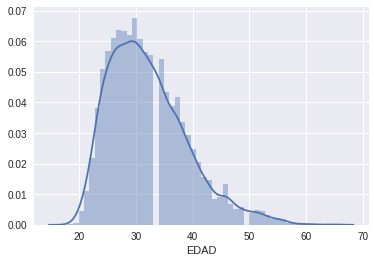

In [34]:
sns.distplot(df_pop_1);

### Boxplot
Una forma sencilla de representar los datos estadísticos en una gráfica en la que se dibuja un rectángulo para representar el segundo y tercer cuartil, con una línea vertical dentro para indicar el valor medio. Los cuartiles inferior y superior se muestran como líneas horizontales a cada lado del rectángulo.

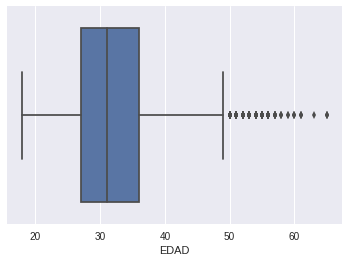

In [35]:
sns.boxplot(df_pop_1);

### Violin Plot
El diagrama de violín es similar a los diagramas de caja, excepto que también muestran la densidad de probabilidad de los datos en diferentes valores. Las gráficas de violín incluyen un marcador para la mediana de los datos y una caja indicando el rango intercuartil, como en las gráficas de caja estándar. Sobrepuesto en esta gráfica de caja hay una estimación de la densidad del núcleo.